### Part 1  - Data Processing

In [8]:
from __future__ import print_function
import random
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import csv
from tqdm.notebook import tqdm
from pprint import pprint
from matplotlib import pyplot as plt

In [5]:
class Args():
   def __init__(self):
     self.batch_size = 64
     self.test_batch_size = 1000     
     self.no_cuda = True
     self.seed = 1
     self.save_model = True

args = Args()

use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)

device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])), shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=args.test_batch_size, shuffle=True, **kwargs)

train_dataset = []
train_segmented = [[],[],[],[],[],[],[],[],[],[]]

for batch_idx, (data, target) in enumerate(train_loader):
    train_dataset.append([data, target])
    train_segmented[target.tolist()[0]].append([data, target])

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)




Train Size :  60000


Train Size :  60000
Class Distribution:  [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


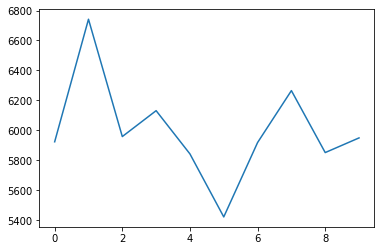

In [26]:
print('Train Size : ', len(train_dataset))
print('Class Distribution: ', [len(x) for x in train_segmented])
plt.plot([len(x) for x in train_segmented])

8


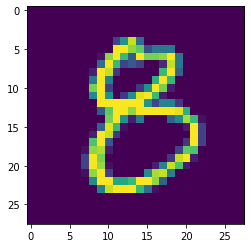

In [25]:
from random import randrange
index = randrange(0, len(train_dataset))
print(train_dataset[index][1].tolist()[0])
plt.imshow(train_dataset[index][0].reshape((28, 28)))

### Part 2  - Audio Visual Textual Dataset Formats